**Flow rate vs Time data is given**

**We will take the data and we will fit pre-defined model given by Arps using scipy a nd we will use it to forecast oil rates in future and reserve analysis.**

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dca_df = pd.read_csv('https://raw.githubusercontent.com/yohanesnuwara/pyreservoir/master/data/norne_production_rate_sample.csv',index_col = 0 , parse_dates = True)

dca_df.head()

,Rate (SCF/d)
Date,
2004-04-01,2706039.0
2004-05-01,2492086.2
2004-06-02,1816846.1
2004-07-02,1920207.4
2004-07-04,1683521.4


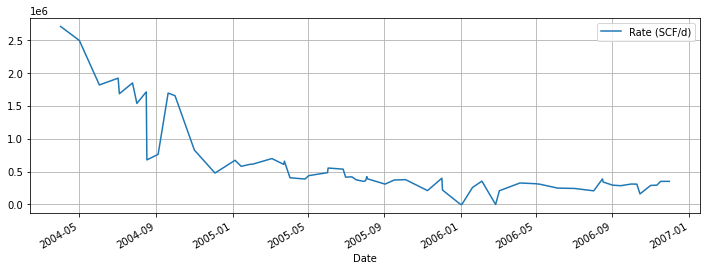

In [ ]:
dca_df.plot(figsize=(12,4))
plt.grid()

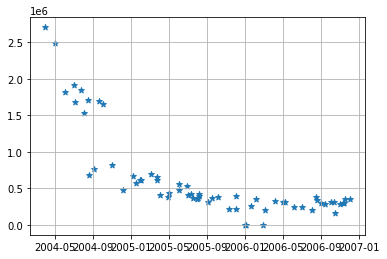

In [ ]:
plt.scatter(y=dca_df['Rate (SCF/d)'],x=dca_df.index,marker='*')

# plt.ylabel('Rate (SCF/d)')
plt.grid()

In [ ]:
def day_maker(df):
    
    '''
    Pass a Time-Series DataFrame to it and it will
    return a days column. Subtracts dates and makes days. 
    
    Returned is a days (np array).
    '''
    
    days = []

    for d in range(len(df)):
    
        delta = df.index[d] - df.index[0]
    
        days.append(delta.days)
    
    days = np.array(days)
    
    return days

In [ ]:
dca_df['days'] = day_maker(dca_df)

In [ ]:
dca_df.head()

,Rate (SCF/d),days
Date,,
2004-04-01,2706039.0,0
2004-05-01,2492086.2,30
2004-06-02,1816846.1,62
2004-07-02,1920207.4,92
2004-07-04,1683521.4,94


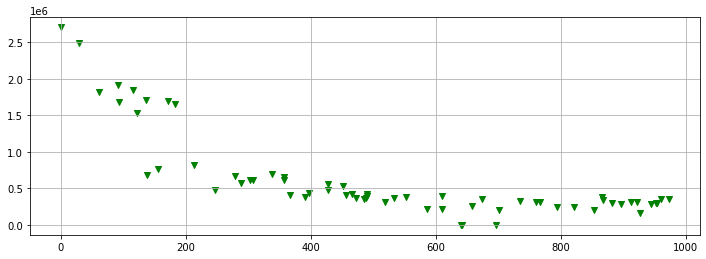

In [ ]:
plt.figure(figsize=(12,4))
plt.scatter(y=dca_df['Rate (SCF/d)'],x=dca_df['days'],marker='v',color='green')

# plt.ylabel('Rate (SCF/d)')
plt.grid()

In [ ]:
from scipy.optimize import curve_fit

In [ ]:
def q_hyp(t,qi,b,d):
    
    qfit = qi/(np.abs((1 + b * d* t))**(1/b))
    
    return qfit


def hyp_fitter(q,t):
        
    #First we have to Normalize so that it converges well and quick.
    q_n = q/max(q)
    t_n = t/max(t)
    
    #curve-fit (optimization of parameters)
    params = curve_fit(q_hyp,t_n,q_n)
    [qi,b,d] = params[0]
    
    #These are for normalized t and q. 
    #will re-adjust for q and t (non-normalized)
    d_f = d/max(t)
    qi_f = qi*max(q)
    
    #Now these parameters can be used.
    q_hyp_fit = q_hyp(t,qi_f,b,d_f)
    
    return q_hyp_fit,params
  

In [ ]:
q = dca_df['Rate (SCF/d)'] ; t = dca_df['days']
q_fit ,params = hyp_fitter(q,t)

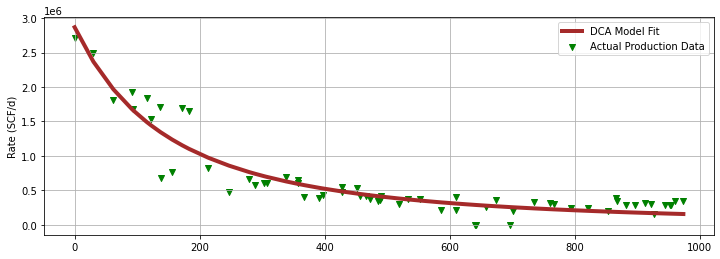

In [ ]:
plt.figure(figsize=(12,4))
plt.scatter(t,q,marker='v',color='green',label='Actual Production Data')
plt.plot(t,q_fit,color='brown',lw=4,label='DCA Model Fit')

plt.ylabel(dca_df.columns[0])

plt.grid()
plt.legend()

Reserves calculation : Numerical Integration : Trapezoid Rule

In [ ]:
q

Date
2004-04-01    2706039.00
2004-05-01    2492086.20
2004-06-02    1816846.10
2004-07-02    1920207.40
2004-07-04    1683521.40
                 ...    
2006-11-01     289382.91
2006-11-09     293290.66
2006-11-11     293359.31
2006-11-17     351398.16
2006-12-01     351398.16
Name: Rate (SCF/d), Length: 64, dtype: float64

In [ ]:
q_fit

Date
2004-04-01    2.866266e+06
2004-05-01    2.367275e+06
2004-06-02    1.966120e+06
2004-07-02    1.675941e+06
2004-07-04    1.658923e+06
                  ...     
2006-11-01    1.658027e+05
2006-11-09    1.636889e+05
2006-11-11    1.631667e+05
2006-11-17    1.616152e+05
2006-12-01    1.580799e+05
Name: days, Length: 64, dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error as mse

In this DCA technique (Physics base, Arps) equation must be known prior to the project. We need that info otherwise we cannot do anything. Whereas in Data Driven approaches, we normally start with ONLY DATA and fit the model that suits the best, use this model for Production Forecasting.